# 데이터사이언스 (0010085001)

## Exercise 15: PyTorch (Linear Models)

* source from : https://github.com/L1aoXingyu/pytorch-beginner

### 1. Linear Regression

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn    # neural network
from torch.autograd import Variable

In [39]:
# 데이터 생성 (x, y) 좌표들에 대한 data
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# numpy.array -> torch.tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [40]:
# Linear regression 모델 생성

### torch.nn.Module
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#module

class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        
        # 필요한 layer 정보 작성
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    # feed forward phase
    def forward(self, x):
        out = self.linear(x)
        return out

model = linearRegression()

In [41]:
# Loss (cost) function 설정

### torch.nn.MSELoss
# https://pytorch.org/docs/stable/nn.html#loss-functions

criterion = nn.MSELoss()

In [42]:
# Optimizer 설정

### torch.optim.SGD (Stochastic gradient descent)
# https://pytorch.org/docs/stable/optim.html

# 우리가 찾고자 하는 minimum E_in가 존재할텐데,
# 그 E_in를 만들어주는 parameter를 찾아주는 과정이 optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [43]:
# 모델 학습
model.train # model을 train mode로 변경 


# 1 epoch : 우리가 가진 모든 data N개를 1번 학습하는 과정
num_epochs = 1000

# training (optimal weight를 찾는 과정)
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    
    # calculate loss
    loss = criterion(out, target)   # \hat{y}

    # backward
    optimizer.zero_grad() # optimizer에 gradient를 초기화
    
    loss.backward()   # back propagation
    optimizer.step()  # parameter updtae

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')


Epoch[20/1000], loss: 0.522974
Epoch[40/1000], loss: 0.513569
Epoch[60/1000], loss: 0.506824
Epoch[80/1000], loss: 0.501961
Epoch[100/1000], loss: 0.498427
Epoch[120/1000], loss: 0.495832
Epoch[140/1000], loss: 0.493902
Epoch[160/1000], loss: 0.492442
Epoch[180/1000], loss: 0.491313
Epoch[200/1000], loss: 0.490419
Epoch[220/1000], loss: 0.489691
Epoch[240/1000], loss: 0.489081
Epoch[260/1000], loss: 0.488553
Epoch[280/1000], loss: 0.488085
Epoch[300/1000], loss: 0.487658
Epoch[320/1000], loss: 0.487260
Epoch[340/1000], loss: 0.486884
Epoch[360/1000], loss: 0.486522
Epoch[380/1000], loss: 0.486171
Epoch[400/1000], loss: 0.485828
Epoch[420/1000], loss: 0.485490
Epoch[440/1000], loss: 0.485157
Epoch[460/1000], loss: 0.484826
Epoch[480/1000], loss: 0.484497
Epoch[500/1000], loss: 0.484170
Epoch[520/1000], loss: 0.483844
Epoch[540/1000], loss: 0.483519
Epoch[560/1000], loss: 0.483195
Epoch[580/1000], loss: 0.482872
Epoch[600/1000], loss: 0.482549
Epoch[620/1000], loss: 0.482226
Epoch[640/10

In [44]:
# test

### torch.nn.Module.eval()
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval
model.eval()  # model을 test mode로 변경 

### torch.no_grad()
# https://pytorch.org/docs/stable/generated/torch.no_grad.html#torch.no_grad
with torch.no_grad():   # data들을 memory에 올렸다가, 해당 연산이 끝나면 memory를 해제하여 불필요한 memory를 잡아먹지 않도록 도와준다.
    predict = model(x_train)

predict = predict.data.numpy()

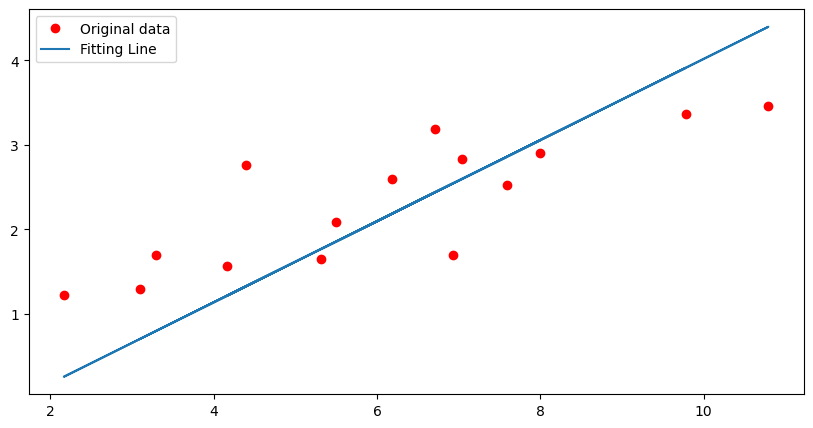

In [45]:
# 학습 결과 시각화

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')

plt.legend() 
plt.show()

In [27]:
# 모델 저장 (즉, 학습으로 얻은 weights 를 저장)

torch.save(model.state_dict(), './linear.pth')

### 2. Logistic Regression

In [28]:
import time

import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [29]:
# 학습 파라미터 설정

batch_size = 64       # model에 넣어주는 data를 한 번에 몇개만큼 넣을건지?
learning_rate = 1e-3   
num_epochs = 10    

In [30]:
# 데이터셋 설정

### torchvision.datasets.FashionMNIST
# https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

train_dataset = datasets.FashionMNIST(root='./data', 
                                      train=True, download=True,
                                      transform=transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root='./data', train=False, 
                                     transform=transforms.ToTensor())

In [31]:
# 데이터 로더 설정

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 

In [32]:
# Logistic regression 모델 생성 
# (Linear Regression과는 달리 "분류" Task를 해야 하기 때문에)

class Logistic_Regression(nn.Module):
    def __init__(self, in_dim, n_class):
        super(Logistic_Regression, self).__init__()
        self.logistic = nn.Linear(in_dim, n_class)   #  MNIST dataset이어다면, n_class는 10이 될 것임
    
    def forward(self, x):   # forward function이 있어야, 나중에 function signal을 계산할 수 있음
        out = self.logistic(x)
        return out

model = Logistic_Regression(28 * 28, 10)

use_gpu = torch.cuda.is_available()
if use_gpu:
    model = model.cuda()

In [33]:
# Loss (cost) function 설정

criterion = nn.CrossEntropyLoss()  
    # 우리의 예측 분포(Q)와 실제 분포(P)가 얼만큼 떨어져 있는지 나타내는 measure.
    # Q를 P에 가깝게 만들어주는 것이 목표.

In [34]:
# Optimizer 설정

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# 모델 학습

for epoch in range(num_epochs):
    print('*' * 10)
    print(f'epoch {epoch+1}')
    
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    
    model.train()  # model을 train mode로 변경.
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)  # 가지고 있는 data의 차원을 바꾸기 위함 ( [28 * 28] --> [(28*28) * 1])
    
        if use_gpu:
            img = img.cuda()
            label = label.cuda()
    
        # forward
        out = model(img)  # 우리가 가지고 있는 input을 model에 넣어 특정 event가 일어날 확률에 대한 예측
    
        # calculate error
        loss = criterion(out, label)  # 예측 분포와 실제 분포를 CrossEntropy를 통해 Error(Loss) 계산.
    
        running_loss += loss.item()


        _, pred = torch.max(out, 1)
        running_acc += (pred==label).float().mean()
    
        # backprop
        optimizer.zero_grad() # optimizer에 gradient를 초기화
        loss.backward()       # back propagation
        optimizer.step()      # parameter updtae

        if i % 300 == 0:
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')

    # 모델 평가 (test)    
    model.eval()

    eval_loss = 0.
    eval_acc = 0.

    for data in test_loader:
        img, label = data   # data는 tuple type이라 img, label로 나눌 수 있음
        img = img.view(img.size(0), -1)

        if use_gpu:
            img = img.cuda()
            label = label.cuda()
        
        with torch.no_grad():
            out = model(img)        # 예측한 Q에 대한 분포
            loss = criterion(out, label) # (실제 P 분포, 예측 Q 분포) 사이의 error 계산
        
        eval_loss += loss.item()
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).float().mean()  # 예측과 label이 맞는 경우, count

    print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')
    print(f'Time:{(time.time()-since):.1f} s')

**********
epoch 1
[1/10] Loss: 2.043427, Acc: 0.404844
[1/10] Loss: 1.857507, Acc: 0.507526
[1/10] Loss: 1.722980, Acc: 0.553385
Finish 1 epoch, Loss: 1.708475, Acc: 0.557403
Test Loss: 1.363277, Acc: 0.653563
Time:4.5 s
**********
epoch 2
[2/10] Loss: 1.296576, Acc: 0.667604
[2/10] Loss: 1.247593, Acc: 0.672344
[2/10] Loss: 1.209552, Acc: 0.673646
Finish 2 epoch, Loss: 1.204969, Acc: 0.673907
Test Loss: 1.105207, Acc: 0.673467
Time:4.3 s
**********
epoch 3
[3/10] Loss: 1.072686, Acc: 0.684792
[3/10] Loss: 1.050115, Acc: 0.688724
[3/10] Loss: 1.029785, Acc: 0.692917
Finish 3 epoch, Loss: 1.027457, Acc: 0.693180
Test Loss: 0.985308, Acc: 0.692974
Time:4.3 s
**********
epoch 4
[4/10] Loss: 0.957393, Acc: 0.707083
[4/10] Loss: 0.945654, Acc: 0.709740
[4/10] Loss: 0.935267, Acc: 0.711528
Finish 4 epoch, Loss: 0.933756, Acc: 0.711954
Test Loss: 0.913730, Acc: 0.707902
Time:4.3 s
**********
epoch 5
[5/10] Loss: 0.888230, Acc: 0.724063
[5/10] Loss: 0.885273, Acc: 0.725130
[5/10] Loss: 0.8752

In [36]:
# 모델 저장 (즉, 학습으로 얻은 weights 를 저장)

torch.save(model.state_dict(), './logstic.pth')